In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
from pathlib import Path
import re

In [2]:
metabolic_results_dir = Path('/Users/riccardoconci/Local_documents/Personalising-Crutches/data/2025.08.05/metabolic_results')

# Get all JSON files and their data
json_files = list(metabolic_results_dir.glob('*.json'))
metabolic_data = [json.load(open(f)) for f in json_files]

# Extract condition codes from filenames
def extract_condition_code(filepath):
    """Extract C8, C9, C10, etc. from filename"""
    filename = filepath.name
    # Look for pattern like "C8", "C9", "C10" at the end of filename
    match = re.search(r'C(\d+)_results\.json$', filename)
    if match:
        return f"C{match.group(1)}"
    return None

# Create DataFrame
df_data = []
for filepath, data in zip(json_files, metabolic_data):
    condition = extract_condition_code(filepath)
    if condition:
        # Flatten the nested dictionary structure
        row = {
            'condition': condition,
            'y_average': data['y_average'],
            't_break': data['fit_params']['t_break'],
            'intercept': data['fit_params']['intercept'],
            'slope1': data['fit_params']['slope1'],
            'slope2': data['fit_params']['slope2']
        }
        df_data.append(row)

# Create DataFrame and set condition as index
metabolic_df = pd.DataFrame(df_data)
metabolic_df = metabolic_df.set_index('condition').sort_index()


In [3]:
metabolic_df

,y_average,t_break,intercept,slope1,slope2
condition,,,,,
C1,6.276703,48.000000,1.465613,0.109046,0.026586
C10,5.869408,53.000000,1.452075,0.100818,0.010685
C11,6.701832,56.806965,2.315732,0.086178,0.023174
C12,6.026909,49.000000,2.267618,0.082892,0.025023
C13,6.303855,100.601146,1.606694,0.052560,0.020147
C14,6.252452,50.083469,2.312978,0.089938,0.015229
C15,6.372741,62.000000,2.247078,0.086090,0.012911
C2,6.484308,46.595902,2.038800,0.103406,0.022065
C3,7.334031,48.830949,1.733171,0.132012,0.018704


In [4]:
trial_summary_df = pd.read_csv('/Users/riccardoconci/Local_documents/Personalising-Crutches/data/2025.08.05/Katie Ho_data_export (2)/trials_summary.csv')

In [5]:
trial_summary_df['geometry_name']

0     Control
1         G10
2         G11
3         G12
4         G13
5         G14
6         G15
7         G16
8         G17
9         G18
10        G20
11        G21
12        G23
13        G24
14        G26
Name: geometry_name, dtype: object

In [6]:
geometry_to_c_mapping = {
    'Control': 'C1',
    'G10': 'C2',
    'G11': 'C3', 
    'G12': 'C4',
    'G13': 'C5',
    'G14': 'C6',
    'G15': 'C7',
    'G16': 'C8',
    'G17': 'C9',
    'G18': 'C10',
    'G20': 'C11',
    'G21': 'C12',
    'G23': 'C13',
    'G24': 'C14',
    'G26': 'C15'
}


In [7]:
trial_summary_df['condition_code'] = trial_summary_df['geometry_name'].map(geometry_to_c_mapping)

# Reset the index of metabolic_df to make 'condition' a regular column
metabolic_df_reset = metabolic_df.reset_index()

# Merge the DataFrames
merged_df = trial_summary_df.merge(
    metabolic_df_reset, 
    left_on='condition_code', 
    right_on='condition', 
    how='left'
)

# Drop the redundant condition_code column if you want
merged_df = merged_df.drop('condition_code', axis=1)



In [22]:
merged_df[['alpha', 'beta', 'gamma', 'instability_loss', 'sus_score', 'y_average', 'tlx_score', 'nrs_score']]

,alpha,beta,gamma,instability_loss,sus_score,y_average,tlx_score,nrs_score
0,95.0,125.0,0.0,0.0183,75.000000,6.276703,16.666667,0.0
1,80.0,110.0,0.0,0.0059,87.500000,6.484308,15.833333,0.0
2,95.0,110.0,0.0,0.0416,79.166667,7.334031,15.000000,0.0
3,110.0,110.0,0.0,0.0245,83.333333,6.919037,18.333333,0.0
4,80.0,125.0,0.0,0.0082,87.500000,7.278968,20.833333,0.0
5,110.0,125.0,0.0,0.0203,79.166667,7.039253,20.833333,0.0
6,80.0,140.0,0.0,0.0099,87.500000,6.891004,16.666667,0.0
7,95.0,140.0,0.0,0.0084,79.166667,6.585330,16.666667,0.0
8,110.0,140.0,0.0,0.0034,87.500000,6.876884,13.333333,0.0
9,80.0,110.0,9.0,0.0275,66.666667,5.869408,26.666667,2.0


In [24]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Copy your original dataframe
df = merged_df.copy()

# Normalize relevant metrics
scaler = MinMaxScaler()

# Normalize these columns
cols_to_normalize = ['instability_loss', 'sus_score', 'y_average', 'tlx_score', 'nrs_score']
df[[col + '_norm' for col in cols_to_normalize]] = scaler.fit_transform(df[cols_to_normalize])

# Create composite scores
df['instability_score'] = df['instability_loss_norm'] - df['sus_score_norm']  # lower is better
df['effort_score'] = df['y_average_norm'] + df['tlx_score_norm']              # lower is better
df['pain_score'] = df['nrs_score_norm']                                       # lower is better


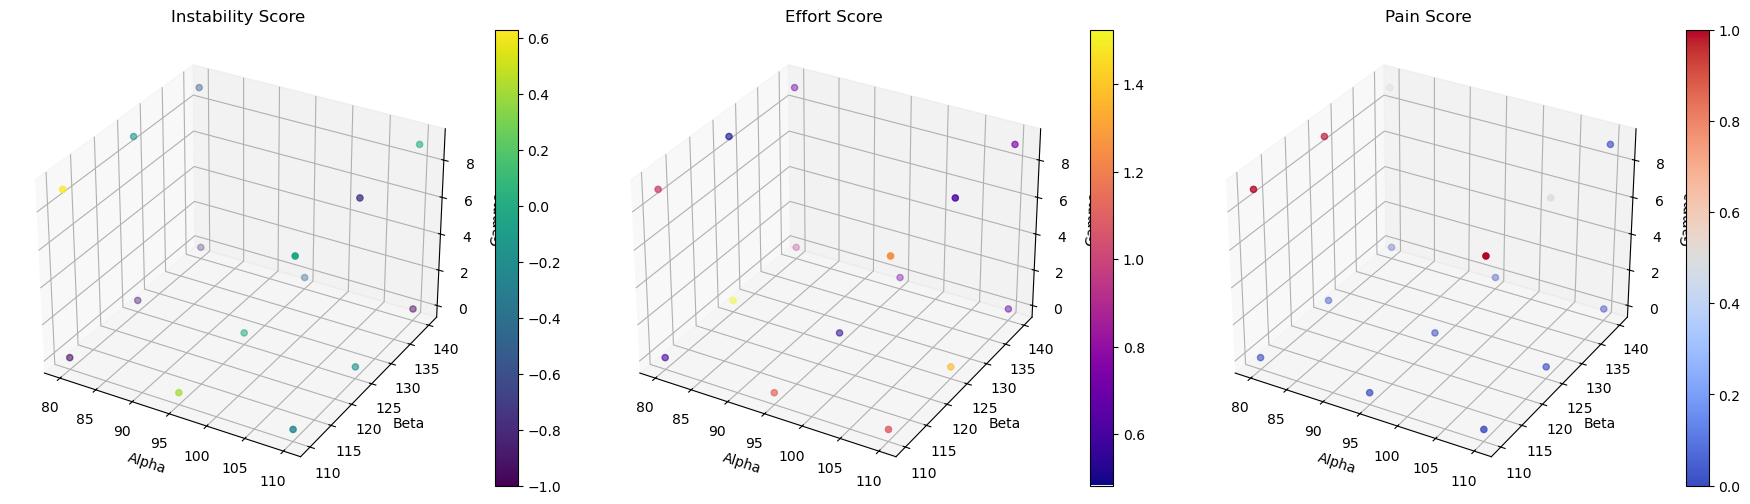

In [25]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(18, 5))

# Instability
ax1 = fig.add_subplot(131, projection='3d')
sc1 = ax1.scatter(df['alpha'], df['beta'], df['gamma'], c=df['instability_score'], cmap='viridis')
ax1.set_title('Instability Score')
ax1.set_xlabel('Alpha'); ax1.set_ylabel('Beta'); ax1.set_zlabel('Gamma')
plt.colorbar(sc1, ax=ax1)

# Effort
ax2 = fig.add_subplot(132, projection='3d')
sc2 = ax2.scatter(df['alpha'], df['beta'], df['gamma'], c=df['effort_score'], cmap='plasma')
ax2.set_title('Effort Score')
ax2.set_xlabel('Alpha'); ax2.set_ylabel('Beta'); ax2.set_zlabel('Gamma')
plt.colorbar(sc2, ax=ax2)

# Pain
ax3 = fig.add_subplot(133, projection='3d')
sc3 = ax3.scatter(df['alpha'], df['beta'], df['gamma'], c=df['pain_score'], cmap='coolwarm')
ax3.set_title('Pain Score')
ax3.set_xlabel('Alpha'); ax3.set_ylabel('Beta'); ax3.set_zlabel('Gamma')
plt.colorbar(sc3, ax=ax3)

plt.tight_layout()
plt.show()


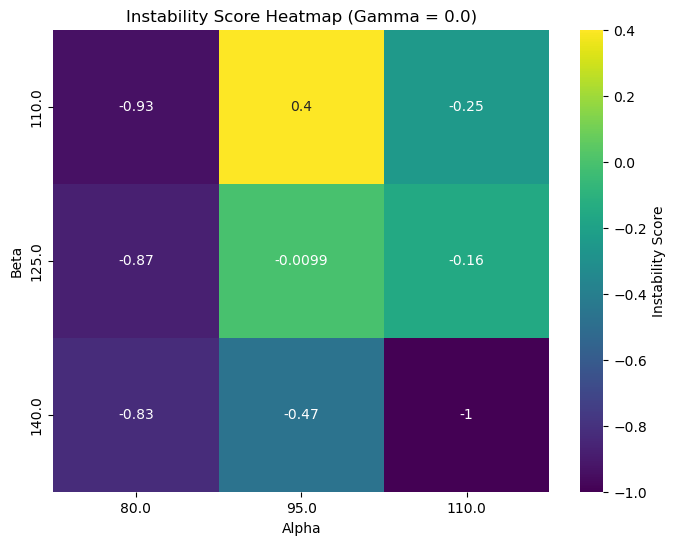

In [27]:
import seaborn as sns

# Choose fixed gamma
gamma_value = 0.0
subset = df[df['gamma'] == gamma_value]

# Pivot to heatmap-friendly format
heatmap_data = subset.pivot(index='beta', columns='alpha', values='instability_score')

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', cbar_kws={'label': 'Instability Score'})
plt.title(f'Instability Score Heatmap (Gamma = {gamma_value})')
plt.xlabel('Alpha'); plt.ylabel('Beta')
plt.show()


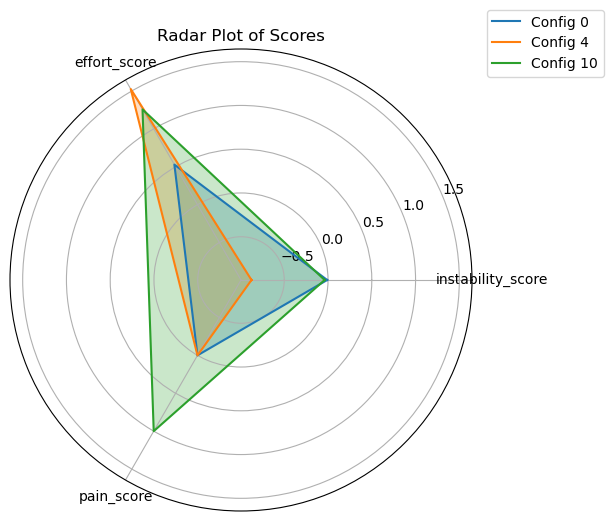

In [29]:
import numpy as np

def plot_radar(data, labels):
    categories = list(data.columns)
    N = len(categories)

    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    data = data.values

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    for d, label in zip(data, labels):
        ax.plot(angles + [angles[0]], np.append(d, d[0]), label=label)
        ax.fill(angles + [angles[0]], np.append(d, d[0]), alpha=0.25)
    
    ax.set_xticks(angles)
    ax.set_xticklabels(categories)
    ax.set_title("Radar Plot of Scores")
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.show()

# Example: Select 3 configs to compare
selected = df.iloc[[0, 4, 10]][['instability_score', 'effort_score', 'pain_score']]
plot_radar(selected, labels=["Config 0", "Config 4", "Config 10"])


In [9]:
import GPy
from GPyOpt.methods import BayesianOptimization
from GPyOpt.core.task.space import Design_space
from GPyOpt.core.task.objective import Objective

In [10]:
print("--- Data Diagnostics for Plotting ---")
print("\nNumber of non-NaN rows for each metric:")

metrics_to_check = [
    'instability_loss',
    'sus_score',
    'y_average',
    'tlx_score',
    'nrs_score'
]

for col in metrics_to_check:
    if col in merged_df:
        non_nan_count = merged_df[col].notna().sum()
        print(f"- {col}: {non_nan_count} valid rows")
        if non_nan_count == 0:
            print("    -> PLOT WILL BE SKIPPED (No data)")
    else:
        print(f"- {col}: COLUMN NOT FOUND")

print("\n--- First 5 rows of relevant columns ---")
print(merged_df[metrics_to_check].head())

--- Data Diagnostics for Plotting ---

Number of non-NaN rows for each metric:
- instability_loss: 15 valid rows
- sus_score: 15 valid rows
- y_average: 15 valid rows
- tlx_score: 15 valid rows
- nrs_score: 15 valid rows

--- First 5 rows of relevant columns ---
   instability_loss  sus_score  y_average  tlx_score  nrs_score
0            0.0183  75.000000   6.276703  16.666667        0.0
1            0.0059  87.500000   6.484308  15.833333        0.0
2            0.0416  79.166667   7.334031  15.000000        0.0
3            0.0245  83.333333   6.919037  18.333333        0.0
4            0.0082  87.500000   7.278968  20.833333        0.0


In [79]:
merged_filtered_df = merged_df[['alpha', 'beta', 'gamma', 'instability_loss', 'sus_score', 'y_average', 'tlx_score', 'nrs_score']]
merged_filtered_df

,alpha,beta,gamma,instability_loss,sus_score,y_average,tlx_score,nrs_score
0,95.0,125.0,0.0,0.0183,75.000000,6.276703,16.666667,0.0
1,80.0,110.0,0.0,0.0059,87.500000,6.484308,15.833333,0.0
2,95.0,110.0,0.0,0.0416,79.166667,7.334031,15.000000,0.0
3,110.0,110.0,0.0,0.0245,83.333333,6.919037,18.333333,0.0
4,80.0,125.0,0.0,0.0082,87.500000,7.278968,20.833333,0.0
5,110.0,125.0,0.0,0.0203,79.166667,7.039253,20.833333,0.0
6,80.0,140.0,0.0,0.0099,87.500000,6.891004,16.666667,0.0
7,95.0,140.0,0.0,0.0084,79.166667,6.585330,16.666667,0.0
8,110.0,140.0,0.0,0.0034,87.500000,6.876884,13.333333,0.0
9,80.0,110.0,9.0,0.0275,66.666667,5.869408,26.666667,2.0


In [83]:
# Step 1: Rename the column
merged_filtered_df = merged_filtered_df.rename(columns={'y_average': 'metabolics'})

# Step 2: Define optimization logic
cols = ['instability_loss', 'sus_score', 'metabolics', 'tlx_score', 'nrs_score']
maximize = ['sus_score']  # higher is better
minimize = [c for c in cols if c not in maximize]

# Step 3: Loop and print top 5 rows per metric (with only relevant columns)
for col in cols:
    print(f"\nTop 5 rows for '{col}' ({'higher is better' if col in maximize else 'lower is better'}):")
    sorted_df = merged_filtered_df.sort_values(by=col, ascending=(col in minimize))
    display(sorted_df[['alpha', 'beta', 'gamma', col]].head(5))


Top 5 rows for 'instability_loss' (lower is better):


,alpha,beta,gamma,instability_loss
8,110.0,140.0,0.0,0.0034
1,80.0,110.0,0.0,0.0059
12,110.0,125.0,9.0,0.0071
4,80.0,125.0,0.0,0.0082
7,95.0,140.0,0.0,0.0084



Top 5 rows for 'sus_score' (higher is better):


,alpha,beta,gamma,sus_score
1,80.0,110.0,0.0,87.500000
4,80.0,125.0,0.0,87.500000
6,80.0,140.0,0.0,87.500000
8,110.0,140.0,0.0,87.500000
3,110.0,110.0,0.0,83.333333



Top 5 rows for 'metabolics' (lower is better):


,alpha,beta,gamma,metabolics
9,80.0,110.0,9.0,5.869408
11,80.0,125.0,9.0,6.026909
13,80.0,140.0,9.0,6.252452
0,95.0,125.0,0.0,6.276703
12,110.0,125.0,9.0,6.303855



Top 5 rows for 'tlx_score' (lower is better):


,alpha,beta,gamma,tlx_score
8,110.0,140.0,0.0,13.333333
2,95.0,110.0,0.0,15.000000
1,80.0,110.0,0.0,15.833333
0,95.0,125.0,0.0,16.666667
6,80.0,140.0,0.0,16.666667



Top 5 rows for 'nrs_score' (lower is better):


,alpha,beta,gamma,nrs_score
0,95.0,125.0,0.0,0.0
1,80.0,110.0,0.0,0.0
2,95.0,110.0,0.0,0.0
3,110.0,110.0,0.0,0.0
4,80.0,125.0,0.0,0.0


In [78]:
merged_filtered_df.to_csv("merged_filtered_df.csv", index=False)

In [ ]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import GPy
import colorsys
import re
from matplotlib.colors import LinearSegmentedColormap

def analyze_and_plot_gp(
    X: np.ndarray,
    Y: np.ndarray,
    model: GPy.models.GPRegression,
    loss_name: str,
    lengthscale: float,
    optimization_mode: str = 'min',
    param_ranges: dict = None
) -> tuple[go.Figure, np.ndarray, float]:
    """
    Analyzes a GP model, finds the optimum, and creates a 3D plot with robust checks.
    """
    if param_ranges is None:
        param_ranges = {
            'alpha': (75, 115, 2), 'beta': (100, 140, 2), 'gamma': (0, 10, 0.5)  # Keep prediction range at 10
        }

    # --- ADDED FOR DEBUGGING ---
    print("\n[DEBUG] Final Optimized GP Model Parameters:")
    print(model)
    # ---------------------------

    # 1. Generate prediction grid
    alpha_range = np.arange(param_ranges['alpha'][0], param_ranges['alpha'][1] + 1, param_ranges['alpha'][2])
    beta_range = np.arange(param_ranges['beta'][0], param_ranges['beta'][1] + 1, param_ranges['beta'][2])
    gamma_range = np.arange(param_ranges['gamma'][0], param_ranges['gamma'][1] + 1, param_ranges['gamma'][2])
    grid_points = np.vstack(np.meshgrid(alpha_range, beta_range, gamma_range)).reshape(3, -1).T
    valid_grid_points = grid_points[(grid_points[:, 0] + grid_points[:, 1]) >= 190]

    # 2. Predict over the grid
    predicted_mean, _ = model.predict(valid_grid_points)    

    # --- ROBUSTNESS CHECK ---
    # Check for NaN or Inf values which will break the plotting function
    num_nan = np.isnan(predicted_mean).sum()
    num_inf = np.isinf(predicted_mean).sum()
    if num_nan > 0 or num_inf > 0:
        print("\n" + "!"*60)
        print(f"[ERROR] Prediction for '{loss_name}' failed.")
        print(f"        Found {num_nan} NaN(s) and {num_inf} Inf(s) in the output.")
        print("        This is likely due to numerical instability with the GP model's hyperparameters.")
        print("        Skipping plot for this combination.")
        print("!"*60 + "\n")
        # Return None to signal that the plot could not be created
        return None, None, None
    # ---------------------------

    # 3. Find the optimum based on the mode
    if optimization_mode == 'max':
        optimal_index = np.argmax(predicted_mean)
        optimum_label = "Max"
    else:
        optimal_index = np.argmin(predicted_mean)
        optimum_label = "Min"
        
    optimal_point = valid_grid_points[optimal_index]
    optimal_value = predicted_mean[optimal_index][0]

    print(f"  Predicted Optimum ({optimum_label}) Geometry (α, β, γ): {optimal_point}")
    print(f"  Predicted {optimum_label} Value: {optimal_value:.4f}")

    loss_colors = ["#FFFF00", "#800080"]
    loss_cmap = []
    for i in range(100):
        frac = i / 99
        r, g, b, _ = LinearSegmentedColormap.from_list("", loss_colors)(frac)
        loss_cmap.append([frac, f'rgb({r*255:.0f},{g*255:.0f},{b*255:.0f})'])

    spread = np.ptp(predicted_mean)
    if spread < 1e-12:
        # Flat surface – pick a single colour
        values_normalized = np.zeros_like(predicted_mean)
    else:
        values_normalized = (predicted_mean - predicted_mean.min()) / spread

    fig = go.Figure()
    fig.add_trace(go.Scatter3d(
        x=valid_grid_points[:, 0], y=valid_grid_points[:, 1], z=valid_grid_points[:, 2],
        mode='markers', marker=dict(
            size=20, color=values_normalized.flatten(), colorscale=loss_cmap,
            colorbar=dict(title=f'{loss_name.replace("_", " ").title()}'), opacity=0.1
        ), showlegend=False,
    ))
    fig.add_trace(go.Scatter3d(
        x=X[:, 0], y=X[:, 1], z=X[:, 2],
        mode='markers', marker=dict(size=10, color=Y.flatten(), colorscale=loss_cmap, opacity=1),
        showlegend=False,
    ))
    fig.add_trace(go.Scatter3d(
        x=[optimal_point[0]], y=[optimal_point[1]], z=[optimal_point[2]],
        mode='markers', marker=dict(symbol='diamond', color='blue', size=15, line=dict(color='black', width=2)),
        name=f'{optimum_label} ({optimal_value:.2f})'
    ))
    fig.update_layout(
        title=f'"{loss_name.replace("_", " ").title()}" ({optimum_label} | Lengthscale: {lengthscale})',
        scene=dict(
            xaxis_title='Alpha', yaxis_title='Beta', zaxis_title='Gamma',
            xaxis_range=[param_ranges['alpha'][0], param_ranges['alpha'][1]],
            yaxis_range=[param_ranges['beta'][0], param_ranges['beta'][1]],
            zaxis_range=[param_ranges['gamma'][0], param_ranges['gamma'][1] + 2],  # Extend visual range by 2 units
        ), margin=dict(l=0, r=0, b=0, t=50), legend=dict(x=0.01, y=0.99)
    )
    
    return fig, optimal_point, optimal_value

In [64]:
# --- Main Execution ---
from pathlib import Path
output_dir = Path("output_plots")
output_dir.mkdir(parents=True, exist_ok=True)


# 1. Define optimization goals for each metric
optimization_goals = {
    'instability_loss': 'min',
    'sus_score':        'max', # Maximize this score
    'y_average':        'min',
    'tlx_score':        'min',
    'nrs_score':        'min',
    'weighted_loss':    'min'  # The combined loss is always minimized
}

# 2. Define weights for the final combined score
weights = {
    'instability_loss': 0.2, 'sus_score': 0.2, 'y_average': 0.2,
    'tlx_score': 0.2, 'nrs_score': 0.2
}

# 3. Prepare the DataFrame with the correctly calculated weighted_loss
def normalize(series: pd.Series) -> pd.Series:
    return (series - series.min()) / (series.max() - series.min())

merged_df['weighted_loss'] = 0.0
for col, weight in weights.items():
    filled_series = merged_df[col].fillna(merged_df[col].median())
    normalized = normalize(filled_series)
    
    # Invert the score for maximization goals, so we can sum them all up for minimization
    if optimization_goals[col] == 'max':
        merged_df['weighted_loss'] += weight * (1 - normalized)
    else:
        merged_df['weighted_loss'] += weight * normalized

# 4. Define the complete list of metrics to analyze
all_metrics_to_analyze = list(optimization_goals.keys())
param_cols = ['alpha', 'beta', 'gamma']
lengthscales_to_test = [2, 5, 10, 15, 30, 50, 100]

# 5. Main loop with improved robustness and error handling
optimizations_results = []
for target_col in all_metrics_to_analyze:
    for l in lengthscales_to_test:
        print("\n" + "="*60)
        print(f"--- Processing '{target_col.upper()}' with Lengthscale: {l} ---")
        print("="*60)

        try:
            # Prepare data
            temp_df = merged_df[param_cols + [target_col]].dropna()
            X = temp_df[param_cols].values
            Y = temp_df[[target_col]].values

            # --- Pre-flight Checks ---
            if len(X) < 2:
                print(f"[INFO] SKIPPING: Not enough valid data points ({len(X)}) for '{target_col}'.")
                continue

            Y_var = np.var(Y)
            print(f"[DEBUG] Variance of Y ('{target_col}') is: {Y_var:.6f}")
            if Y_var < 1e-9: # If variance is practically zero
                print(f"[INFO] SKIPPING: Variance of '{target_col}' is negligible. Cannot fit a meaningful GP model.")
                continue
            # --- End Checks ---

            # Create kernel with variance from data
            kernel = GPy.kern.Matern52(input_dim=X.shape[1], variance=Y_var, lengthscale=float(l))
            
            # Create the GP model with a more sensible starting noise variance (1% of data variance)
            model = GPy.models.GPRegression(X, Y, kernel, noise_var=Y_var * 0.01)

            model.kern.lengthscale.fix()
            
            # Optimize the model
            print("[INFO] Optimizing GP model...")
            model.optimize(messages=False, max_iters=1000)
            print("[INFO] Optimization complete.")
            # Optional: print the model to see the final hyperparameters
            #print(model)

            # Analyze and plot
            current_mode = optimization_goals[target_col]
            fig, optimal_point, optimal_value = analyze_and_plot_gp(
                X, Y, model, target_col, l, optimization_mode=current_mode
            )

            # ---- FIX IS HERE ----
            # Only show the plot and store results if the figure was created successfully
            if fig:
                # Generate filename with metric and lengthscale info
                filename_html = f"{target_col}_lengthscale_{l}.html"
                filename_png = f"{target_col}_lengthscale_{l}.png"
                filepath_html = os.path.join(output_dir, filename_html)
                filepath_png = os.path.join(output_dir, filename_png)
                
                # Save as HTML (interactive)
                fig.write_html(filepath_html)
                print(f"[INFO] Saved interactive plot to: {filepath_html}") 

            # Store results
            optimizations_results.append({
                'metric': target_col, 'lengthscale': l, 'optimization_mode': current_mode,
                'optimal_alpha': optimal_point[0], 'optimal_beta': optimal_point[1], 'optimal_gamma': optimal_point[2],
                'predicted_value': optimal_value
            })

        except Exception as e:
            # This block will catch any error and tell us what it is
            print("\n" + "!"*60)
            print(f"ERROR encountered while processing '{target_col}' with lengthscale {l}.")
            print(f"The error was: {e}")
            import traceback
            traceback.print_exc()
            print("!"*60 + "\n")


# 6. Create and display the final results DataFrame
results_df = pd.DataFrame(optimizations_results)



--- Processing 'INSTABILITY_LOSS' with Lengthscale: 2 ---
[DEBUG] Variance of Y ('instability_loss') is: 0.000095
[INFO] Optimizing GP model...
[INFO] Optimization complete.

[DEBUG] Final Optimized GP Model Parameters:

Name : GP regression
Objective : -38.38135263369907
Number of Parameters : 3
Number of Optimization Parameters : 2
Updates : True
Parameters:
  GP_regression.           |                   value  |  constraints  |  priors
  Mat52.variance           |  0.00034980119395288756  |      +ve      |        
  Mat52.lengthscale        |                     2.0  |   +ve fixed   |        
  Gaussian_noise.variance  |    9.56218438082316e-07  |      +ve      |        
  Predicted Optimum (Min) Geometry (α, β, γ): [103. 100. -10.]
  Predicted Min Value: 0.0000
[INFO] Saved interactive plot to: output_plots/instability_loss_lengthscale_2.html

--- Processing 'INSTABILITY_LOSS' with Lengthscale: 5 ---
[DEBUG] Variance of Y ('instability_loss') is: 0.000095
[INFO] Optimizing GP mode

In [66]:
results_df

,metric,lengthscale,optimization_mode,optimal_alpha,optimal_beta,optimal_gamma,predicted_value
0,instability_loss,2,min,103.0,100.0,-10.0,1.342200e-07
1,instability_loss,5,min,115.0,140.0,-10.0,1.535013e-04
2,instability_loss,10,min,77.0,114.0,-8.0,-1.687293e-03
3,instability_loss,15,min,75.0,116.0,-10.0,1.135257e-03
4,instability_loss,30,min,75.0,140.0,-10.0,5.990193e-03
5,instability_loss,50,min,75.0,140.0,-10.0,8.479722e-03
6,instability_loss,100,min,75.0,140.0,-10.0,1.124108e-02
7,sus_score,2,max,95.0,140.0,0.0,4.375402e+01
8,sus_score,5,max,81.0,140.0,1.0,8.784026e+01
9,sus_score,10,max,81.0,138.0,3.5,9.595842e+01


In [68]:
import plotly.graph_objects as go
import pandas as pd
import colorsys
import re

def get_shaded_color(base_rgb_str, value, min_val, max_val, lightness_range=(0.8, 0.3)):
    """
    Calculates a shaded color by adjusting the lightness of a base RGB color.

    Args:
        base_rgb_str: The base color in 'rgb(r, g, b)' format.
        value: The value (e.g., lengthscale) to map to a shade.
        min_val: The minimum of the value range.
        max_val: The maximum of the value range.
        lightness_range: A tuple (max_lightness, min_lightness) for the output.

    Returns:
        A new 'rgb(r, g, b)' string with adjusted lightness.
    """
    # Parse 'rgb(r,g,b)' string into integer components
    try:
        r, g, b = map(int, re.search(r'rgb\((\d+),\s*(\d+),\s*(\d+)\)', base_rgb_str).groups())
    except AttributeError:
        return 'rgb(0,0,0)' # Return black if parsing fails

    # Normalize the value to a 0-1 range
    if max_val == min_val:
        norm_val = 0.5
    else:
        norm_val = (value - min_val) / (max_val - min_val)

    # Convert the base RGB to HLS (Hue, Lightness, Saturation) color space
    h, l, s = colorsys.rgb_to_hls(r / 255.0, g / 255.0, b / 255.0)

    # Interpolate the lightness based on the normalized value
    # A low value gets a light shade; a high value gets a dark shade.
    new_lightness = lightness_range[0] - (norm_val * (lightness_range[0] - lightness_range[1]))

    # Convert the new HLS color back to RGB
    new_r, new_g, new_b = colorsys.hls_to_rgb(h, new_lightness, s)

    # Return the new color as an 'rgb(...)' string
    return f'rgb({int(new_r * 255)}, {int(new_g * 255)}, {int(new_b * 255)})'


# --- Plotting the Final Summary ---

# 1. Define mappings for symbols and base colors for each metric
# Using Plotly's default categorical colors for a nice palette.
symbol_map = {
    'instability_loss': 'circle', 'sus_score': 'diamond', 'metabolics': 'square',
    'tlx_score': 'circle-open', 'nrs_score': 'cross', 'weighted_loss': 'x'
}
color_map = {
    'instability_loss': 'rgb(31, 119, 180)',  # Blue
    'sus_score':        'rgb(255, 127, 14)',   # Orange
    'metabolics':       'rgb(44, 160, 44)',   # Green
    'tlx_score':        'rgb(214, 39, 40)',   # Red
    'nrs_score':        'rgb(148, 103, 189)',  # Purple
    'weighted_loss':    'rgb(140, 86, 75)'    # Brown
}

# 2. Get the global min and max lengthscale for consistent shading
min_ls = results_df['lengthscale'].min()
max_ls = results_df['lengthscale'].max()

# 3. Create the figure
summary_fig = go.Figure()

# 4. Iterate through each metric to plot it as a separate trace
for metric_name, group_df in results_df.groupby('metric'):
    # Convert 'y_average' to 'metabolics' for display purposes
    display_name = 'metabolics' if metric_name == 'y_average' else metric_name
    
    # Calculate the specific color for each point in the group based on its lengthscale
    colors_for_trace = [
        get_shaded_color(color_map.get(display_name), ls, min_ls, max_ls)
        for ls in group_df['lengthscale']
    ]

    summary_fig.add_trace(go.Scatter3d(
        x=group_df['optimal_alpha'],
        y=group_df['optimal_beta'],
        z=group_df['optimal_gamma'],
        mode='markers',
        # Use hover text to show details
        hovertemplate=(
            "<b>Metric:</b> " + display_name.replace("_", " ").title() + "<br>"
            "<b>Lengthscale:</b> %{customdata[0]}<br>"
            "<b>Alpha:</b> %{x}<br>"
            "<b>Beta:</b> %{y}<br>"
            "<b>Gamma:</b> %{z}<extra></extra>"
        ),
        customdata=group_df[['lengthscale']],
        marker=dict(
            color=colors_for_trace,  # Apply the manually calculated colors
            symbol=symbol_map.get(display_name, 'circle'),
            size=10,
            opacity=0.9,
            line=dict(color='black', width=1) # Add a border for better visibility
        ),
        name=display_name.replace("_", " ").title()
    ))

# 5. Customize layout
summary_fig.update_layout(
    title='Predicted Optimal Geometries (Color by Metric, Shade by Lengthscale)',
    scene=dict(
        xaxis_title='Optimal Alpha',
        yaxis_title='Optimal Beta',
        zaxis_title='Optimal Gamma',
        xaxis_range=[75, 115],
        yaxis_range=[100, 140],
        zaxis_range=[-11, 11]
    ),
    legend_title_text='Metric',
    margin=dict(l=0, r=0, b=0, t=50)
)

summary_fig.show()



In [69]:

# Save the plot instead of showing it
import os
from datetime import datetime

# Create output directory if it doesn't exist
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
output_dir = f"gp_optimization_plots_{timestamp}"
os.makedirs(output_dir, exist_ok=True)

# Save as HTML (interactive)
filename_html = f"summary_plot_{timestamp}.html"
filepath_html = os.path.join(output_dir, filename_html)
summary_fig.write_html(filepath_html)
print(f"[INFO] Saved summary plot to: {filepath_html}")

# Save as PNG (static image) - requires kaleido
try:
    filename_png = f"summary_plot_{timestamp}.png"
    filepath_png = os.path.join(output_dir, filename_png)
    summary_fig.write_image(filepath_png, width=1200, height=800, scale=2)
    print(f"[INFO] Saved summary plot to: {filepath_png}")
except Exception as e:
    print(f"[WARNING] Could not save PNG (kaleido not installed): {e}")
    print("[INFO] Install kaleido with: pip install kaleido")

[INFO] Saved summary plot to: gp_optimization_plots_20250805_235440/summary_plot_20250805_235440.html
[WARNING] Could not save PNG (kaleido not installed): 
Image export using the "kaleido" engine requires the Kaleido package,
which can be installed using pip:

    $ pip install --upgrade kaleido

[INFO] Install kaleido with: pip install kaleido


In [ ]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import GPy
import colorsys
import re

# (Your existing 'analyze_and_plot_gp' and 'normalize' functions go here)
# ...

# --- Main Execution ---

# 1. Define optimization goals for EACH individual metric
optimization_goals = {
    'instability_loss': 'min', 'sus_score': 'max', 'y_average': 'min',
    'tlx_score': 'min', 'nrs_score': 'min'
}

# 2. Define the new composite loss groups
composite_loss_groups = {
    'instability_composite': ['instability_loss', 'sus_score'],
    'effort_composite':      ['y_average', 'tlx_score'],
    'pain_composite':        ['nrs_score']
}

# 3. Calculate the new composite loss columns in the DataFrame
print("--- Calculating Composite Losses ---")
for group_name, members in composite_loss_groups.items():
    # Each component within a group is weighted equally (1 / number of members)
    weight = 1.0 / len(members)
    merged_df[group_name] = 0.0

    for member_col in members:
        filled_series = merged_df[member_col].fillna(merged_df[member_col].median())
        normalized = normalize(filled_series)
        
        # Invert scores that we want to maximize
        if optimization_goals.get(member_col) == 'max':
            merged_df[group_name] += weight * (1 - normalized)
        else:
            merged_df[group_name] += weight * normalized
    print(f"Calculated '{group_name}' column.")
    
# 4. Define all metrics and parameters for the main analysis
all_composite_metrics_to_analyze = list(composite_loss_groups.keys())
param_cols = ['alpha', 'beta', 'gamma']
lengthscales_to_test = [2, 5, 10, 15, 30, 50, 100]

# 5. Main GP analysis loop for the new composite losses
composite_results = []
for target_col in all_composite_metrics_to_analyze:
    # All composite losses are minimized by design
    optimization_mode = 'min'

    for l in lengthscales_to_test:
        print(f"\n--- Processing '{target_col.upper()}' with FIXED Lengthscale: {l} ---")
        
        # Prepare data
        temp_df = merged_df[param_cols + [target_col]].dropna()
        X = temp_df[param_cols].values
        Y = temp_df[[target_col]].values

        if len(X) < 2: continue

        # Create and optimize the model
        kernel = GPy.kern.Matern52(input_dim=X.shape[1], variance=np.var(Y), lengthscale=float(l))
        model = GPy.models.GPRegression(X, Y, kernel, noise_var=np.var(Y) * 0.01)
        #model.kern.lengthscale.fix()
        model.optimize(messages=False)

        # Analyze and store results
        _, optimal_point, optimal_value = analyze_and_plot_gp(
            X, Y, model, target_col, l, optimization_mode=optimization_mode
        )
        
        composite_results.append({
            'metric': target_col, 'lengthscale': l, 'optimal_alpha': optimal_point[0],
            'optimal_beta': optimal_point[1], 'optimal_gamma': optimal_point[2],
            'predicted_value': optimal_value
        })

# 6. Create the final summary DataFrame for the composite results
composite_results_df = pd.DataFrame(composite_results)

# --- Final Visualization of Composite Optima ---

# (The 'get_shaded_color' helper function from the previous step goes here)
# ...

print("\n--- Plotting Final Summary of Composite Optimums ---")

# Define distinct colors and shapes for the composite groups
composite_color_map = {
    'instability_composite': 'rgb(0, 114, 178)',   # Blue
    'effort_composite':      'rgb(213, 94, 0)',     # Vermillion/Red
    'pain_composite':        'rgb(0, 158, 115)',     # Bluish Green
}
composite_symbol_map = {
    'instability_composite': 'diamond',
    'effort_composite':      'square',
    'pain_composite':        'circle',
}

min_ls = composite_results_df['lengthscale'].min()
max_ls = composite_results_df['lengthscale'].max()
summary_fig = go.Figure()

for metric_name, group_df in composite_results_df.groupby('metric'):
    colors_for_trace = [
        get_shaded_color(composite_color_map.get(metric_name), ls, min_ls, max_ls)
        for ls in group_df['lengthscale']
    ]

    summary_fig.add_trace(go.Scatter3d(
        x=group_df['optimal_alpha'],
        y=group_df['optimal_beta'],
        z=group_df['optimal_gamma'],
        mode='markers',
        hovertemplate=(
            "<b>Metric:</b> " + metric_name.replace('_', ' ').title() + "<br>"
            "<b>Lengthscale:</b> %{customdata[0]}<br>"
            "<b>Alpha:</b> %{x}, <b>Beta:</b> %{y}, <b>Gamma:</b> %{z}<extra></extra>"
        ),
        customdata=group_df[['lengthscale']],
        marker=dict(
            color=colors_for_trace,
            symbol=composite_symbol_map.get(metric_name, 'circle'),
            size=12,
            opacity=0.9,
            line=dict(color='black', width=2)
        ),
        name=metric_name.replace('_', ' ').title()
    ))

summary_fig.update_layout(
    title='Optimal Geometries for Composite Loss Types',
    scene=dict(
        xaxis_title='Optimal Alpha', yaxis_title='Optimal Beta', zaxis_title='Optimal Gamma',
        xaxis_range=[75, 115], yaxis_range=[100, 140], zaxis_range=[-10, 11]
    ),
    legend_title_text='Composite Metric',
    margin=dict(l=0, r=0, b=0, t=50)
)

summary_fig.show()


--- Calculating Composite Losses ---
Calculated 'instability_composite' column.
Calculated 'effort_composite' column.
Calculated 'pain_composite' column.

--- Processing 'INSTABILITY_COMPOSITE' with FIXED Lengthscale: 2 ---

[DEBUG] Final Optimized GP Model Parameters:

Name : GP regression
Objective : 1.908172812400296
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |                 value  |  constraints  |  priors
  Mat52.variance           |   0.11403358316569322  |      +ve      |        
  Mat52.lengthscale        |    113.37025179375507  |      +ve      |        
  Gaussian_noise.variance  |  0.056193487349199184  |      +ve      |        
  Predicted Optimum (Min) Geometry (α, β, γ): [ 75. 140. -10.]
  Predicted Min Value: 0.2460

--- Processing 'INSTABILITY_COMPOSITE' with FIXED Lengthscale: 5 ---

[DEBUG] Final Optimized GP Model Parameters:

Name : GP regression
Objective : 1.908172812711121
Number of Param

In [72]:
composite_results_df

,metric,lengthscale,optimal_alpha,optimal_beta,optimal_gamma,predicted_value
0,instability_composite,2,75.0,140.0,-10.0,0.246050
1,instability_composite,5,75.0,140.0,-10.0,0.246053
2,instability_composite,10,75.0,140.0,-10.0,0.246051
3,instability_composite,15,75.0,140.0,-10.0,0.246048
4,instability_composite,30,75.0,140.0,-10.0,0.246051
5,instability_composite,50,75.0,140.0,-10.0,0.246050
6,instability_composite,100,75.0,140.0,-10.0,0.246050
7,effort_composite,2,75.0,140.0,10.5,0.442035
8,effort_composite,5,75.0,140.0,10.5,0.442022
9,effort_composite,10,75.0,140.0,10.5,0.442028


In [48]:
composite_results_df

,metric,lengthscale,optimal_alpha,optimal_beta,optimal_gamma,predicted_value
0,instability_composite,2,75.0,140.0,-2.0,0.257410
1,instability_composite,5,75.0,140.0,-2.0,0.257413
2,instability_composite,10,75.0,140.0,-2.0,0.257411
3,instability_composite,15,75.0,140.0,-2.0,0.257409
4,instability_composite,30,75.0,140.0,-2.0,0.257411
5,instability_composite,50,75.0,140.0,-2.0,0.257410
6,instability_composite,100,75.0,140.0,-2.0,0.257410
7,effort_composite,2,75.0,140.0,10.5,0.442035
8,effort_composite,5,75.0,140.0,10.5,0.442022
9,effort_composite,10,75.0,140.0,10.5,0.442028
